In [7]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

Tamño de la image:  (240, 352)


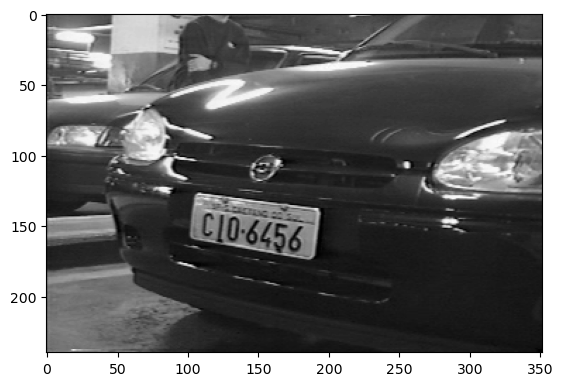

In [55]:
img1 = imageio.imread('../placa4.png')
print("Tamño de la image: ", img1.shape)
plt.imshow(img1, cmap="gray")
plt.show()

## Preprocesing:

source: 
- https://www.geeksforgeeks.org/detect-and-recognize-car-license-plate-from-a-video-in-real-time/
- https://pyimagesearch.com/2020/09/21/opencv-automatic-license-number-plate-recognition-anpr-with-python/


## 2. Preprocesamiento:
1.  Investigación del método “contorno-placa” propuesto en una imagen:
 - i. Prepara imagen en escala de grises
 -ii. Aplicar Filtro Gaussiano ( Eliminar ruido y suavizar la imagen)
 - iii. Aplicar Filtro Sobel Vertical X(Detectar bordes verticales)
 - iv. Aplicar Umbral OTSU(Para binarizar y segmentar imagen)
 - v. Aplicar Operación Closing( Para realzar la forma de la placa)
 - vi. Aplicar Operación Opening( Para eliminar puntos negros y realzar la forma de la placa)
 - vii. Obtener Contorno de la placa(Imagen Mascara):
    1. Opción 1: Dividir imagen en 2 y usar la parte inferior. Está opción fue la aplicada debido a que analizando las imágenes se encontró que el contorno de las imágenes se encontraron en la parte inferior de las imágenes procesadas.
    2. Opción 2: Uso del algoritmo moore, square tracing. Está opción aún está en proceso debido a tiempo de prueba y ajuste del algoritmo.
    
2. Creación de dataset:
 - i. Aplicamos el método “contorno-placa” para encontrar la imagen mascara de todas las imágenes originales.
 - ii. Aplicar Algoritmo Bounding Box para encontrar las coordenadas del contorno de la placa.
   1. Se aplicó técnicas estadísticas cómo media, outliers, para validar el valor del ancho(W - Width) y largo(H - Height) utilizado.
 - iii. Crear dataset de imágenes fondo.
 - iv. Crear dataset de imágenes placa.

(240, 352)


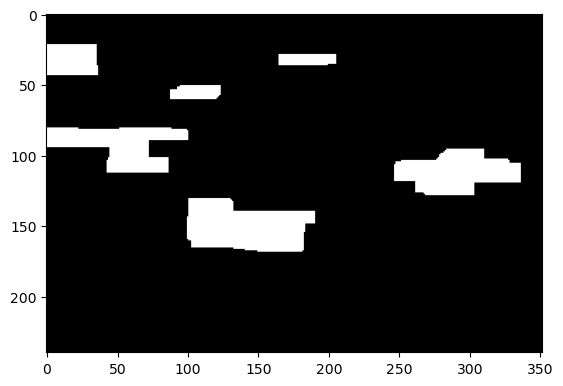

In [56]:
# Gausiano
# Sobel Vertical X
# Threshold OSTU
# Closing+Opening

# Gaussia Filter
blur_img1 = cv.GaussianBlur(img1,(7,7),0)

# Solve Vertical X
grad_img1 = cv2.Sobel(blur_img1, cv2.CV_8U, 1, 0, ksize = 3)
print(grad_img1.shape)
# Threshold OSTU
ret3,th3_img1 = cv.threshold(grad_img1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Taking a matrix of size 5 as the kernel
kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize =(27, 7))
closing_img1 = cv.morphologyEx(th3_img1, cv.MORPH_CLOSE, kernel)
opening_img1 = cv.morphologyEx(closing_img1, cv.MORPH_OPEN, kernel)

plt.imshow(opening_img1, cmap="gray")
plt.show()

In [57]:
contours, _ = cv2.findContours(opening_img1, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_NONE)

In [58]:
contours[0]

array([[[101, 131]],

       [[101, 132]],

       [[101, 133]],

       [[101, 134]],

       [[101, 135]],

       [[101, 136]],

       [[101, 137]],

       [[101, 138]],

       [[101, 139]],

       [[101, 140]],

       [[101, 141]],

       [[101, 142]],

       [[101, 143]],

       [[100, 144]],

       [[100, 145]],

       [[100, 146]],

       [[100, 147]],

       [[100, 148]],

       [[100, 149]],

       [[100, 150]],

       [[100, 151]],

       [[100, 152]],

       [[100, 153]],

       [[100, 154]],

       [[100, 155]],

       [[100, 156]],

       [[100, 157]],

       [[100, 158]],

       [[100, 159]],

       [[101, 160]],

       [[102, 160]],

       [[103, 161]],

       [[103, 162]],

       [[103, 163]],

       [[103, 164]],

       [[103, 165]],

       [[104, 165]],

       [[105, 165]],

       [[106, 165]],

       [[107, 165]],

       [[108, 165]],

       [[109, 165]],

       [[110, 165]],

       [[111, 165]],

       [[112, 165]],

       [[1